# Station Density Profile of Westcoast Earthquake Early Warning Stations

## Create csv of all EEW sites

Must have the following headers:
* net
* sta
* chan
* location
* lat
* lon
* rate*

*sample rate(not required)


In [17]:
##some constants for all plots
#path to local magd_client
magd_client_path = '/Users/joncon/Sites/magd_client/'

lat_min=29.0
lat_max=54.0
lon_min=-131.0
lon_max=-112.0

resolution=0.1
#number of stations to use in solution. 
num_solutions=4

#create dicts to hold grid paths
grid_paths={}

# wave velocities
velocity_p = 5.4
velocity_s = 3



In [18]:
#only run once
import os
os.chdir(magd_client_path)
print('Working in ' + os.getcwd())
from magD.pickle import *
#set book to autoreload
%load_ext autoreload
%autoreload 2
%matplotlib inline

Working in /Users/joncon/Sites/magd_client
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Create and save MapGrids

### Ran at following commit levels
MagD commit

magd_client commit

In [23]:
#name of config file in ./config/{name}.ini
name ="eew_density_west_coast"

#contour around event
%run -i scripts/make_grids.py \
--name=$name \
--grid_types=dist_max \
--lat_min=$lat_min \
--lat_max=$lat_max \
--lon_min=$lon_min \
--lon_max=$lon_max \
--resolution=$resolution \
--num_solutions=$num_solutions

#instantiate grid object(s) using _grid_paths dict created by script
grid_paths[name] = _grid_paths
grid_eew_west_coast = get_pickle(grid_paths[name]['dist_max'])


Profiling spatially...
Path for dist_max:
/Users/joncon/Sites/magd_client/scripts/../pickle_jar/eew_density_west_coast/dist_max_grid/250x190-res-0.1.pickle


In [27]:
#create blindzone grid for depth = 8km
grid_eew_west_coast8 = grid_eew_west_coast.copy("eew_west_coast", "eew_west_coast8")
grid_eew_west_coast8.transform_to_blindzone(velocity_p, velocity_s, 8)
grid_eew_west_coast8.save()
grid_eew_west_coast8_path = grid_eew_west_coast8.get_path()

#create blindzone grid for depth = 20km
grid_eew_west_coast20 = grid_eew_west_coast.copy("eew_west_coast", "eew_west_coast20")
grid_eew_west_coast20.transform_to_blindzone(velocity_p, velocity_s, 20)
grid_eew_west_coast20.save()
grid_eew_west_coast20_path = grid_eew_west_coast20.get_path()

#create blindzone grid for depth = 50km
grid_eew_west_coast50 = grid_eew_west_coast.copy("eew_west_coast", "eew_west_coast50")
grid_eew_west_coast50.transform_to_blindzone(velocity_p, velocity_s, 50)
grid_eew_west_coast50.save()
grid_eew_west_coast50_path = grid_eew_west_coast50.get_path()

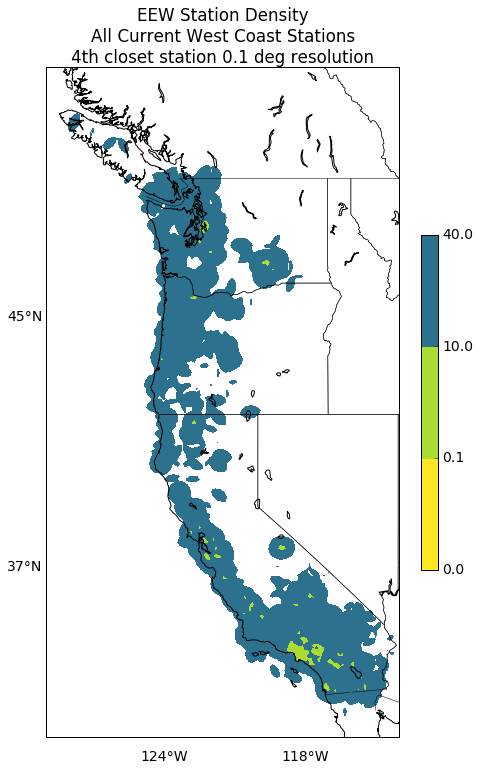

In [32]:
path = grid_paths[name]['dist_max']
%run -i scripts/plot_heatmap.py \
--path=$path \
--title1="EEW Station Density" \
--title2="All Current West Coast Stations" \
--title3="4th closet station 0.1 deg resolution" \
--color=viridis_r \
--levels=0,0.1,10,40

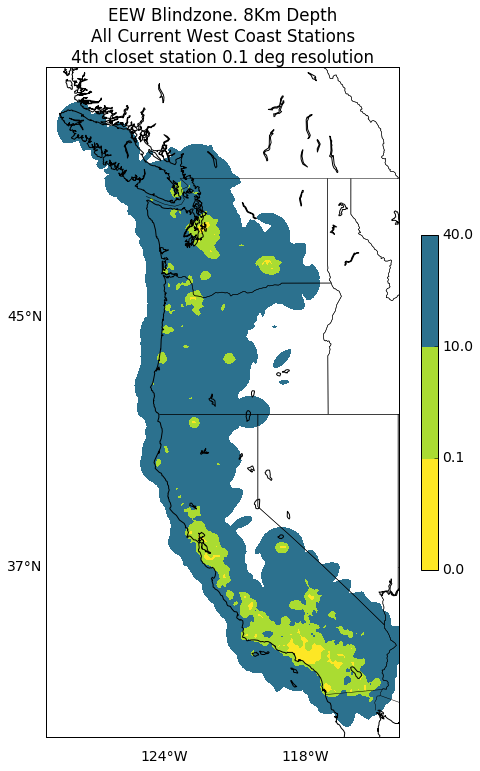

In [33]:
%run -i scripts/plot_heatmap.py \
--path=$grid_eew_west_coast8_path \
--title1="EEW Blindzone. 8Km Depth" \
--title2="All Current West Coast Stations" \
--title3="4th closet station 0.1 deg resolution" \
--color=viridis_r \
--levels=0,0.1,10,40

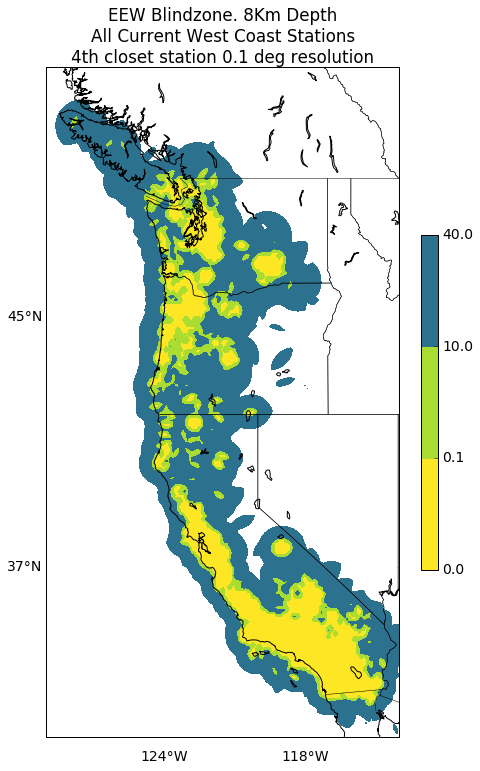

In [34]:
%run -i scripts/plot_heatmap.py \
--path=$grid_eew_west_coast20_path \
--title1="EEW Blindzone. 8Km Depth" \
--title2="All Current West Coast Stations" \
--title3="4th closet station 0.1 deg resolution" \
--color=viridis_r \
--levels=0,0.1,10,40

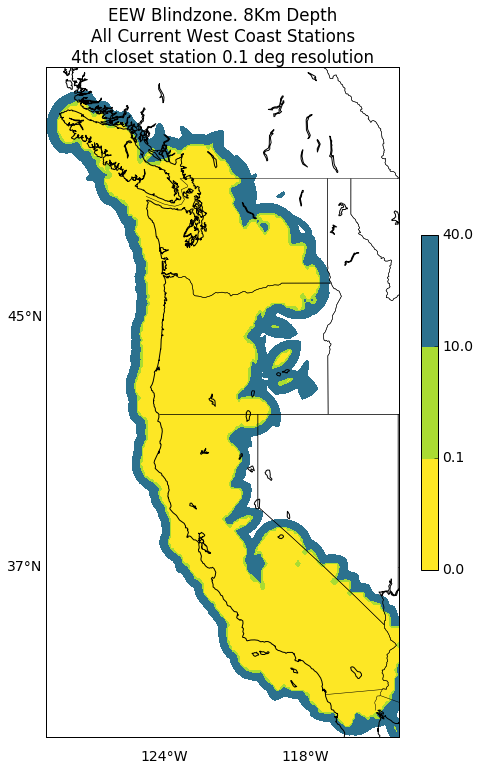

In [35]:
%run -i scripts/plot_heatmap.py \
--path=$grid_eew_west_coast50_path \
--title1="EEW Blindzone. 8Km Depth" \
--title2="All Current West Coast Stations" \
--title3="4th closet station 0.1 deg resolution" \
--color=viridis_r \
--levels=0,0.1,10,40